In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
#from model.resnet import ResNet18
from main import *
from utils import *
#from model import*

Files already downloaded and verified
Files already downloaded and verified


In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [3]:
dropout= 0.025
from model import Model_S9
#!pip install torchsummary
from torchsummary import* 
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Model_S9().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
         Dropout2d-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]             576
            Conv2d-6           [-1, 64, 32, 32]           4,096
              ReLU-7           [-1, 64, 32, 32]               0
       BatchNorm2d-8           [-1, 64, 32, 32]             128
         Dropout2d-9           [-1, 64, 32, 32]               0
           Conv2d-10           [-1, 16, 15, 15]           9,232
           Conv2d-11           [-1, 64, 15, 15]           9,216
             ReLU-12           [-1, 64, 15, 15]               0
      BatchNorm2d-13           [-1, 64, 15, 15]             128
        Dropout2d-14           [-1

In [4]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return test_loss, 100.*correct/len(test_loader.dataset)

In [5]:
epochs = 100
lr = 0.001
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
#optimizer = optim.Adam(model.parameters(), lr=lr)
scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=8, verbose=True)
criterion = nn.CrossEntropyLoss()

In [6]:
train_loss_list = []
test_loss_list = []
train_accuracy_list=[]
test_accuracy_list=[]

from torch.optim.lr_scheduler import StepLR
#model = Model_3().to(device)
#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
#scheduler = StepLR(optimizer, step_size =6, gamma =0.2)

epochs = 100
for epoch in range(100):
    print(f"Epoch {epoch}")
   
    train_loss,train_acc = train(model, device, trainloader, optimizer, epoch, criterion)

    test_loss,test_acc = test(model,device,  testloader)

    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)

    train_accuracy_list.append(train_acc)
    test_accuracy_list.append(test_acc)

  0%|                                                                                          | 0/391 [00:00<?, ?it/s]

Epoch 0


loss=1.7841503620147705 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 24.51it/s]



Train set: Average loss: 0.0150, Accuracy: 14376/50000 (28.75%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.6042, Accuracy: 4096/10000 (40.96%)

Epoch 1


loss=1.897027611732483 batch_id=390: 100%|███████████████████████████████████████████| 391/391 [00:15<00:00, 25.65it/s]



Train set: Average loss: 0.0131, Accuracy: 19395/50000 (38.79%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.4069, Accuracy: 4859/10000 (48.59%)

Epoch 2


loss=1.4878594875335693 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.08it/s]



Train set: Average loss: 0.0122, Accuracy: 21755/50000 (43.51%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.3251, Accuracy: 5211/10000 (52.11%)

Epoch 3


loss=1.3983347415924072 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.33it/s]



Train set: Average loss: 0.0115, Accuracy: 23315/50000 (46.63%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.2372, Accuracy: 5522/10000 (55.22%)

Epoch 4


loss=1.3038972616195679 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.27it/s]



Train set: Average loss: 0.0110, Accuracy: 24776/50000 (49.55%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.1610, Accuracy: 5829/10000 (58.29%)

Epoch 5


loss=1.3312089443206787 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.19it/s]



Train set: Average loss: 0.0105, Accuracy: 25797/50000 (51.59%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0904, Accuracy: 6110/10000 (61.10%)

Epoch 6


loss=1.2508749961853027 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.34it/s]



Train set: Average loss: 0.0101, Accuracy: 26814/50000 (53.63%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0920, Accuracy: 6132/10000 (61.32%)

Epoch 7


loss=1.2829393148422241 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.50it/s]



Train set: Average loss: 0.0098, Accuracy: 27418/50000 (54.84%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 1.0228, Accuracy: 6331/10000 (63.31%)

Epoch 8


loss=1.471895456314087 batch_id=390: 100%|███████████████████████████████████████████| 391/391 [00:15<00:00, 25.28it/s]



Train set: Average loss: 0.0095, Accuracy: 28199/50000 (56.40%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9847, Accuracy: 6499/10000 (64.99%)

Epoch 9


loss=1.238592505455017 batch_id=390: 100%|███████████████████████████████████████████| 391/391 [00:15<00:00, 25.56it/s]



Train set: Average loss: 0.0092, Accuracy: 28866/50000 (57.73%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9425, Accuracy: 6654/10000 (66.54%)

Epoch 10


loss=1.1712870597839355 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.06it/s]



Train set: Average loss: 0.0090, Accuracy: 29303/50000 (58.61%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9644, Accuracy: 6542/10000 (65.42%)

Epoch 11


loss=1.1258816719055176 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.45it/s]



Train set: Average loss: 0.0088, Accuracy: 29913/50000 (59.83%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.9484, Accuracy: 6625/10000 (66.25%)

Epoch 12


loss=0.9758813977241516 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.40it/s]



Train set: Average loss: 0.0086, Accuracy: 30167/50000 (60.33%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8787, Accuracy: 6897/10000 (68.97%)

Epoch 13


loss=0.9608126878738403 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 24.65it/s]



Train set: Average loss: 0.0085, Accuracy: 30772/50000 (61.54%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8499, Accuracy: 7045/10000 (70.45%)

Epoch 14


loss=1.0632293224334717 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 24.82it/s]



Train set: Average loss: 0.0083, Accuracy: 31167/50000 (62.33%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8321, Accuracy: 7096/10000 (70.96%)

Epoch 15


loss=1.0326062440872192 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.46it/s]



Train set: Average loss: 0.0082, Accuracy: 31479/50000 (62.96%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.8453, Accuracy: 7040/10000 (70.40%)

Epoch 16


loss=0.9285277128219604 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.21it/s]



Train set: Average loss: 0.0080, Accuracy: 31851/50000 (63.70%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7879, Accuracy: 7233/10000 (72.33%)

Epoch 17


loss=1.0614964962005615 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.17it/s]



Train set: Average loss: 0.0079, Accuracy: 32050/50000 (64.10%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7881, Accuracy: 7262/10000 (72.62%)

Epoch 18


loss=0.8972031474113464 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.12it/s]



Train set: Average loss: 0.0077, Accuracy: 32484/50000 (64.97%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7693, Accuracy: 7318/10000 (73.18%)

Epoch 19


loss=0.8850242495536804 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.34it/s]



Train set: Average loss: 0.0076, Accuracy: 32801/50000 (65.60%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7718, Accuracy: 7287/10000 (72.87%)

Epoch 20


loss=1.0845134258270264 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.10it/s]



Train set: Average loss: 0.0076, Accuracy: 32842/50000 (65.68%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7275, Accuracy: 7465/10000 (74.65%)

Epoch 21


loss=1.0688121318817139 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 24.98it/s]



Train set: Average loss: 0.0075, Accuracy: 33080/50000 (66.16%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7447, Accuracy: 7406/10000 (74.06%)

Epoch 22


loss=0.9426898956298828 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 24.77it/s]



Train set: Average loss: 0.0074, Accuracy: 33396/50000 (66.79%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7284, Accuracy: 7459/10000 (74.59%)

Epoch 23


loss=0.8878846168518066 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.41it/s]



Train set: Average loss: 0.0073, Accuracy: 33556/50000 (67.11%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7049, Accuracy: 7536/10000 (75.36%)

Epoch 24


loss=0.7905139923095703 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.08it/s]



Train set: Average loss: 0.0072, Accuracy: 33794/50000 (67.59%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6972, Accuracy: 7613/10000 (76.13%)

Epoch 25


loss=0.9995321035385132 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:16<00:00, 24.38it/s]



Train set: Average loss: 0.0071, Accuracy: 34069/50000 (68.14%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7175, Accuracy: 7513/10000 (75.13%)

Epoch 26


loss=0.9152721166610718 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.19it/s]



Train set: Average loss: 0.0070, Accuracy: 34226/50000 (68.45%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6705, Accuracy: 7665/10000 (76.65%)

Epoch 27


loss=0.8057035207748413 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.17it/s]



Train set: Average loss: 0.0069, Accuracy: 34386/50000 (68.77%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6621, Accuracy: 7693/10000 (76.93%)

Epoch 28


loss=0.8870744705200195 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.27it/s]



Train set: Average loss: 0.0068, Accuracy: 34652/50000 (69.30%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6913, Accuracy: 7602/10000 (76.02%)

Epoch 29


loss=0.6140034794807434 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.66it/s]



Train set: Average loss: 0.0068, Accuracy: 34658/50000 (69.32%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6502, Accuracy: 7729/10000 (77.29%)

Epoch 30


loss=0.72629314661026 batch_id=390: 100%|████████████████████████████████████████████| 391/391 [00:15<00:00, 24.56it/s]



Train set: Average loss: 0.0067, Accuracy: 34915/50000 (69.83%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6440, Accuracy: 7804/10000 (78.04%)

Epoch 31


loss=1.071027398109436 batch_id=390: 100%|███████████████████████████████████████████| 391/391 [00:15<00:00, 25.29it/s]



Train set: Average loss: 0.0067, Accuracy: 35035/50000 (70.07%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6399, Accuracy: 7801/10000 (78.01%)

Epoch 32


loss=0.7894321084022522 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.14it/s]



Train set: Average loss: 0.0066, Accuracy: 35094/50000 (70.19%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6345, Accuracy: 7817/10000 (78.17%)

Epoch 33


loss=0.8869915008544922 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.55it/s]



Train set: Average loss: 0.0066, Accuracy: 35209/50000 (70.42%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6325, Accuracy: 7844/10000 (78.44%)

Epoch 34


loss=0.7969050407409668 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 24.94it/s]



Train set: Average loss: 0.0065, Accuracy: 35494/50000 (70.99%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6337, Accuracy: 7828/10000 (78.28%)

Epoch 35


loss=0.755499541759491 batch_id=390: 100%|███████████████████████████████████████████| 391/391 [00:15<00:00, 25.51it/s]



Train set: Average loss: 0.0064, Accuracy: 35470/50000 (70.94%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6195, Accuracy: 7861/10000 (78.61%)

Epoch 36


loss=1.0160701274871826 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.45it/s]



Train set: Average loss: 0.0064, Accuracy: 35618/50000 (71.24%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6140, Accuracy: 7911/10000 (79.11%)

Epoch 37


loss=0.7976306676864624 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.35it/s]



Train set: Average loss: 0.0063, Accuracy: 35707/50000 (71.41%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6267, Accuracy: 7873/10000 (78.73%)

Epoch 38


loss=0.7944031953811646 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.25it/s]



Train set: Average loss: 0.0063, Accuracy: 35943/50000 (71.89%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6128, Accuracy: 7909/10000 (79.09%)

Epoch 39


loss=0.751278281211853 batch_id=390: 100%|███████████████████████████████████████████| 391/391 [00:15<00:00, 25.40it/s]



Train set: Average loss: 0.0063, Accuracy: 35974/50000 (71.95%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5918, Accuracy: 7970/10000 (79.70%)

Epoch 40


loss=0.5851884484291077 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.30it/s]



Train set: Average loss: 0.0062, Accuracy: 36067/50000 (72.13%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5886, Accuracy: 7993/10000 (79.93%)

Epoch 41


loss=0.7321708798408508 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.65it/s]



Train set: Average loss: 0.0062, Accuracy: 36109/50000 (72.22%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5844, Accuracy: 7982/10000 (79.82%)

Epoch 42


loss=0.7057793736457825 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.06it/s]



Train set: Average loss: 0.0061, Accuracy: 36240/50000 (72.48%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5784, Accuracy: 7998/10000 (79.98%)

Epoch 43


loss=0.7111309766769409 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.10it/s]



Train set: Average loss: 0.0060, Accuracy: 36596/50000 (73.19%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5786, Accuracy: 8006/10000 (80.06%)

Epoch 44


loss=0.7580864429473877 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.37it/s]



Train set: Average loss: 0.0060, Accuracy: 36430/50000 (72.86%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5723, Accuracy: 8009/10000 (80.09%)

Epoch 45


loss=0.9155274629592896 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.27it/s]



Train set: Average loss: 0.0060, Accuracy: 36698/50000 (73.40%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5552, Accuracy: 8120/10000 (81.20%)

Epoch 46


loss=0.6965622901916504 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 24.93it/s]



Train set: Average loss: 0.0060, Accuracy: 36611/50000 (73.22%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5635, Accuracy: 8088/10000 (80.88%)

Epoch 47


loss=0.6692991852760315 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.09it/s]



Train set: Average loss: 0.0060, Accuracy: 36541/50000 (73.08%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5710, Accuracy: 8029/10000 (80.29%)

Epoch 48


loss=0.9467030763626099 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.27it/s]



Train set: Average loss: 0.0059, Accuracy: 36789/50000 (73.58%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5900, Accuracy: 7975/10000 (79.75%)

Epoch 49


loss=0.7658344507217407 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.40it/s]



Train set: Average loss: 0.0058, Accuracy: 36981/50000 (73.96%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5820, Accuracy: 8022/10000 (80.22%)

Epoch 50


loss=1.2077152729034424 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.36it/s]



Train set: Average loss: 0.0058, Accuracy: 36988/50000 (73.98%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5557, Accuracy: 8099/10000 (80.99%)

Epoch 51


loss=0.9433670043945312 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.40it/s]



Train set: Average loss: 0.0058, Accuracy: 37141/50000 (74.28%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5494, Accuracy: 8130/10000 (81.30%)

Epoch 52


loss=0.7106602787971497 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.15it/s]



Train set: Average loss: 0.0057, Accuracy: 37138/50000 (74.28%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5537, Accuracy: 8108/10000 (81.08%)

Epoch 53


loss=0.5487588047981262 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.47it/s]



Train set: Average loss: 0.0056, Accuracy: 37365/50000 (74.73%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5482, Accuracy: 8123/10000 (81.23%)

Epoch 54


loss=0.6756510138511658 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.16it/s]



Train set: Average loss: 0.0057, Accuracy: 37177/50000 (74.35%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5430, Accuracy: 8140/10000 (81.40%)

Epoch 55


loss=0.711391031742096 batch_id=390: 100%|███████████████████████████████████████████| 391/391 [00:15<00:00, 25.02it/s]



Train set: Average loss: 0.0056, Accuracy: 37427/50000 (74.85%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5475, Accuracy: 8177/10000 (81.77%)

Epoch 56


loss=0.8847934603691101 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 24.66it/s]



Train set: Average loss: 0.0056, Accuracy: 37426/50000 (74.85%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5307, Accuracy: 8204/10000 (82.04%)

Epoch 57


loss=0.7688889503479004 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 24.50it/s]



Train set: Average loss: 0.0055, Accuracy: 37648/50000 (75.30%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5259, Accuracy: 8257/10000 (82.57%)

Epoch 58


loss=0.6598649621009827 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.16it/s]



Train set: Average loss: 0.0055, Accuracy: 37573/50000 (75.15%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5249, Accuracy: 8217/10000 (82.17%)

Epoch 59


loss=0.7184009552001953 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.35it/s]



Train set: Average loss: 0.0055, Accuracy: 37696/50000 (75.39%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5288, Accuracy: 8233/10000 (82.33%)

Epoch 60


loss=0.6170490980148315 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.25it/s]



Train set: Average loss: 0.0055, Accuracy: 37783/50000 (75.57%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5282, Accuracy: 8236/10000 (82.36%)

Epoch 61


loss=0.597887396812439 batch_id=390: 100%|███████████████████████████████████████████| 391/391 [00:15<00:00, 25.59it/s]



Train set: Average loss: 0.0054, Accuracy: 37756/50000 (75.51%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5433, Accuracy: 8133/10000 (81.33%)

Epoch 62


loss=0.7510669827461243 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.21it/s]



Train set: Average loss: 0.0054, Accuracy: 37863/50000 (75.73%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5183, Accuracy: 8222/10000 (82.22%)

Epoch 63


loss=0.710771381855011 batch_id=390: 100%|███████████████████████████████████████████| 391/391 [00:15<00:00, 25.01it/s]



Train set: Average loss: 0.0053, Accuracy: 38017/50000 (76.03%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5313, Accuracy: 8188/10000 (81.88%)

Epoch 64


loss=0.6368809342384338 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.36it/s]



Train set: Average loss: 0.0053, Accuracy: 38065/50000 (76.13%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5318, Accuracy: 8218/10000 (82.18%)

Epoch 65


loss=0.7690561413764954 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.55it/s]



Train set: Average loss: 0.0054, Accuracy: 37888/50000 (75.78%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5165, Accuracy: 8264/10000 (82.64%)

Epoch 66


loss=0.7051378488540649 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.71it/s]



Train set: Average loss: 0.0053, Accuracy: 37978/50000 (75.96%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5091, Accuracy: 8278/10000 (82.78%)

Epoch 67


loss=0.8297174572944641 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.49it/s]



Train set: Average loss: 0.0053, Accuracy: 38208/50000 (76.42%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5185, Accuracy: 8283/10000 (82.83%)

Epoch 68


loss=0.7870315313339233 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.36it/s]



Train set: Average loss: 0.0053, Accuracy: 38095/50000 (76.19%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5031, Accuracy: 8303/10000 (83.03%)

Epoch 69


loss=0.6260192394256592 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.36it/s]



Train set: Average loss: 0.0053, Accuracy: 38253/50000 (76.51%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5109, Accuracy: 8287/10000 (82.87%)

Epoch 70


loss=0.5811640620231628 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.16it/s]



Train set: Average loss: 0.0052, Accuracy: 38315/50000 (76.63%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5173, Accuracy: 8241/10000 (82.41%)

Epoch 71


loss=0.6745232939720154 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.39it/s]



Train set: Average loss: 0.0053, Accuracy: 38175/50000 (76.35%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4948, Accuracy: 8320/10000 (83.20%)

Epoch 72


loss=0.7617298364639282 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.32it/s]



Train set: Average loss: 0.0052, Accuracy: 38417/50000 (76.83%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5046, Accuracy: 8295/10000 (82.95%)

Epoch 73


loss=0.4786178171634674 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.50it/s]



Train set: Average loss: 0.0052, Accuracy: 38263/50000 (76.53%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5091, Accuracy: 8288/10000 (82.88%)

Epoch 74


loss=0.7357445359230042 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:16<00:00, 24.43it/s]



Train set: Average loss: 0.0051, Accuracy: 38511/50000 (77.02%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5042, Accuracy: 8303/10000 (83.03%)

Epoch 75


loss=0.6764846444129944 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.14it/s]



Train set: Average loss: 0.0051, Accuracy: 38485/50000 (76.97%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5040, Accuracy: 8341/10000 (83.41%)

Epoch 76


loss=0.4888429045677185 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 24.92it/s]



Train set: Average loss: 0.0051, Accuracy: 38548/50000 (77.10%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4971, Accuracy: 8357/10000 (83.57%)

Epoch 77


loss=0.752963662147522 batch_id=390: 100%|███████████████████████████████████████████| 391/391 [00:15<00:00, 25.68it/s]



Train set: Average loss: 0.0051, Accuracy: 38601/50000 (77.20%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5057, Accuracy: 8310/10000 (83.10%)

Epoch 78


loss=0.6662600636482239 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.45it/s]



Train set: Average loss: 0.0051, Accuracy: 38605/50000 (77.21%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5075, Accuracy: 8324/10000 (83.24%)

Epoch 79


loss=0.5908516049385071 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.76it/s]



Train set: Average loss: 0.0051, Accuracy: 38697/50000 (77.39%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4936, Accuracy: 8368/10000 (83.68%)

Epoch 80


loss=0.5809906721115112 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.12it/s]



Train set: Average loss: 0.0050, Accuracy: 38606/50000 (77.21%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4988, Accuracy: 8319/10000 (83.19%)

Epoch 81


loss=0.5314252972602844 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.48it/s]



Train set: Average loss: 0.0050, Accuracy: 38636/50000 (77.27%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4896, Accuracy: 8388/10000 (83.88%)

Epoch 82


loss=0.4266818165779114 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.49it/s]



Train set: Average loss: 0.0050, Accuracy: 38781/50000 (77.56%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4825, Accuracy: 8406/10000 (84.06%)

Epoch 83


loss=0.5021710991859436 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.21it/s]



Train set: Average loss: 0.0050, Accuracy: 38899/50000 (77.80%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4963, Accuracy: 8353/10000 (83.53%)

Epoch 84


loss=0.5798185467720032 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.60it/s]



Train set: Average loss: 0.0049, Accuracy: 39063/50000 (78.13%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4937, Accuracy: 8375/10000 (83.75%)

Epoch 85


loss=0.6653871536254883 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.54it/s]



Train set: Average loss: 0.0048, Accuracy: 39085/50000 (78.17%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5043, Accuracy: 8320/10000 (83.20%)

Epoch 86


loss=0.6494154334068298 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.44it/s]



Train set: Average loss: 0.0049, Accuracy: 39067/50000 (78.13%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4797, Accuracy: 8416/10000 (84.16%)

Epoch 87


loss=0.6097344160079956 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.23it/s]



Train set: Average loss: 0.0049, Accuracy: 39010/50000 (78.02%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4833, Accuracy: 8389/10000 (83.89%)

Epoch 88


loss=0.6632564663887024 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.33it/s]



Train set: Average loss: 0.0049, Accuracy: 39170/50000 (78.34%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4869, Accuracy: 8373/10000 (83.73%)

Epoch 89


loss=0.52046799659729 batch_id=390: 100%|████████████████████████████████████████████| 391/391 [00:15<00:00, 25.72it/s]



Train set: Average loss: 0.0049, Accuracy: 39006/50000 (78.01%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4792, Accuracy: 8370/10000 (83.70%)

Epoch 90


loss=0.5367876291275024 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.36it/s]



Train set: Average loss: 0.0049, Accuracy: 39076/50000 (78.15%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4960, Accuracy: 8373/10000 (83.73%)

Epoch 91


loss=0.6059703230857849 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.36it/s]



Train set: Average loss: 0.0048, Accuracy: 39150/50000 (78.30%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4781, Accuracy: 8406/10000 (84.06%)

Epoch 92


loss=0.5978890657424927 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.81it/s]



Train set: Average loss: 0.0048, Accuracy: 39197/50000 (78.39%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.5078, Accuracy: 8319/10000 (83.19%)

Epoch 93


loss=0.6661232709884644 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.53it/s]



Train set: Average loss: 0.0048, Accuracy: 39200/50000 (78.40%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4765, Accuracy: 8437/10000 (84.37%)

Epoch 94


loss=0.6827669143676758 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.33it/s]



Train set: Average loss: 0.0048, Accuracy: 39277/50000 (78.55%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4799, Accuracy: 8406/10000 (84.06%)

Epoch 95


loss=0.5405906438827515 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.43it/s]



Train set: Average loss: 0.0047, Accuracy: 39420/50000 (78.84%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4733, Accuracy: 8430/10000 (84.30%)

Epoch 96


loss=0.5942559242248535 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.57it/s]



Train set: Average loss: 0.0047, Accuracy: 39342/50000 (78.68%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4754, Accuracy: 8416/10000 (84.16%)

Epoch 97


loss=0.7052971124649048 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.82it/s]



Train set: Average loss: 0.0047, Accuracy: 39510/50000 (79.02%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4596, Accuracy: 8480/10000 (84.80%)

Epoch 98


loss=0.6020059585571289 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:16<00:00, 24.21it/s]



Train set: Average loss: 0.0047, Accuracy: 39539/50000 (79.08%)



  0%|                                                                                          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.4683, Accuracy: 8463/10000 (84.63%)

Epoch 99


loss=0.4805909991264343 batch_id=390: 100%|██████████████████████████████████████████| 391/391 [00:15<00:00, 25.40it/s]



Train set: Average loss: 0.0047, Accuracy: 39408/50000 (78.82%)


Test set: Average loss: 0.4561, Accuracy: 8504/10000 (85.04%)



Text(0.5, 1.0, 'Loss per epoch')

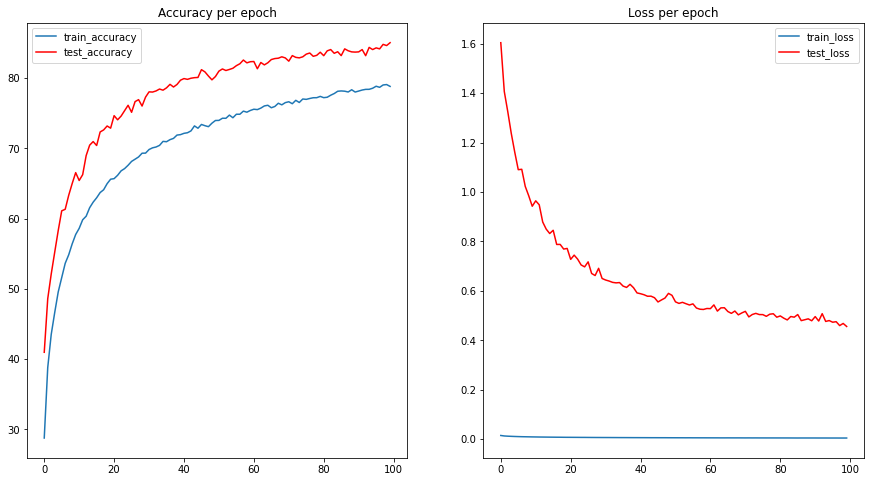

In [7]:

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 8]

plt.subplot(1,2, 1)

plt.plot(np.array(train_accuracy_list))
plt.plot(np.array(test_accuracy_list), 'r')
plt.legend(["train_accuracy", "test_accuracy"])
plt.title("Accuracy per epoch")

plt.subplot(1,2,2)
plt.plot(train_loss_list)
plt.plot(test_loss_list, 'r')
plt.legend(["train_loss", "test_loss"])
plt.title("Loss per epoch")

In [8]:
from pylab import *

def getWrongPredictions(model, device, val_loader):
    wrong_idx = []
    wrong_samples = []
    wrong_preds = []
    actual_values = []

    for data,target in val_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)

        wrong_idx = (pred != target.view_as(pred)).nonzero()[:, 0]
        wrong_samples.append(data[wrong_idx])
        wrong_preds.append(pred[wrong_idx])
        actual_values.append(target.view_as(pred)[wrong_idx])
    return list(zip(torch.cat(wrong_samples),torch.cat(wrong_preds),torch.cat(actual_values)))

def plotWrongPredictions(wrong_predictions):
    fig = plt.figure(figsize=(10,10))
    mean,std = (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)
    for i, (sample, wrong_pred, actual_value) in enumerate(wrong_predictions[:20]):
        sample, wrong_pred, actual_value = sample.cpu().numpy(), wrong_pred.cpu(), actual_value.cpu()
        # Undo normalization
        for j in range(sample.shape[0]):
            sample[j] = (sample[j]*std[j])+mean[j]
        sample = np.transpose(sample, (1, 2, 0))
        ax = fig.add_subplot(4, 5, i+1)
        ax.axis('off')
        ax.set_title(f'actual {classes[actual_value.item()]}\npredicted {classes[wrong_pred.item()]}',fontsize=15)
        ax.imshow(sample)
    plt.show()
def imshow(img,c = "" ):    
    npimg = img.numpy()
    fig = plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)),interpolation='none')
    plt.title(c)

In [9]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck') 

In [10]:
train_loader, test_loader = getCifar10DataLoader() 
#net = net.to(device)
model.eval()
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images.to(device))
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

#classes = testset.classes
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Files already downloaded and verified
Files already downloaded and verified
Accuracy of plane : 87 %
Accuracy of   car : 93 %
Accuracy of  bird : 72 %
Accuracy of   cat : 57 %
Accuracy of  deer : 86 %
Accuracy of   dog : 80 %
Accuracy of  frog : 93 %
Accuracy of horse : 91 %
Accuracy of  ship : 91 %
Accuracy of truck : 85 %


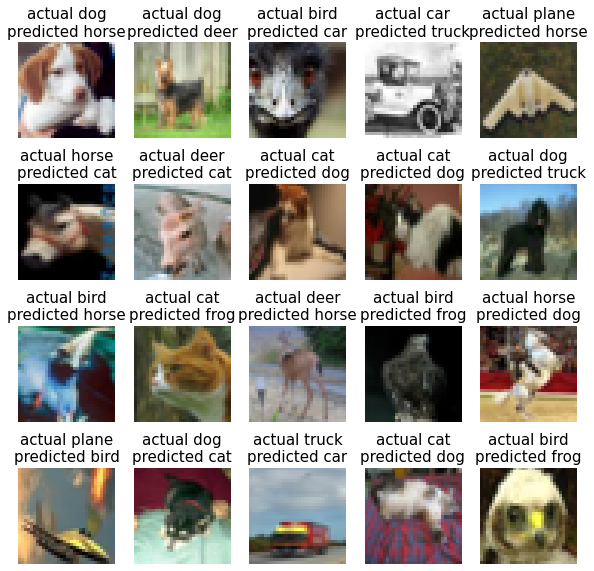

In [11]:
wp = getWrongPredictions(model, device, test_loader)
plotWrongPredictions(wp)